### Titanic Survival Perdiction

In [3]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# reading file

df = pd.read_csv("data/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking for null values for cleaning the dataset
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

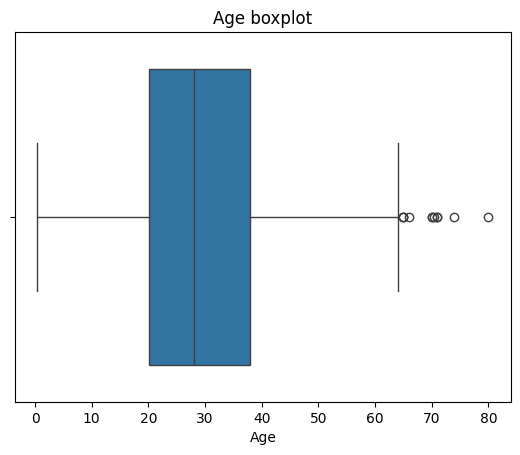

In [6]:
# visualizinng age column for null value decision
sns.boxplot(x = df["Age"])
plt.title("Age boxplot")
plt.show()

#### Visualization findings : The plot seems to have been right skewed and few outliers are all there!!

In [7]:
# changing the null values will median

median_value = df["Age"].median()
df["Age"] = df["Age"].fillna(median_value).astype("int")

# cross checking
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# removing the columns which are not neccesary for training a model
df = df.drop(["PassengerId" , "Name" , "Ticket" , "Cabin" ] , axis = 1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [9]:
df["Sex"].value_counts() , df["Embarked"].value_counts()

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [10]:
# changing the string value  as numerical in column

df["Sex"] = df["Sex"].map({"male":0,"female":1})
df["Embarked"] = df["Embarked"].map({"S":0 , "C":1 , "Q":2})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0.0
1,1,1,1,38,1,0,71.2833,1.0
2,1,3,1,26,0,0,7.9250,0.0
3,1,1,1,35,1,0,53.1000,0.0
4,0,3,0,35,0,0,8.0500,0.0


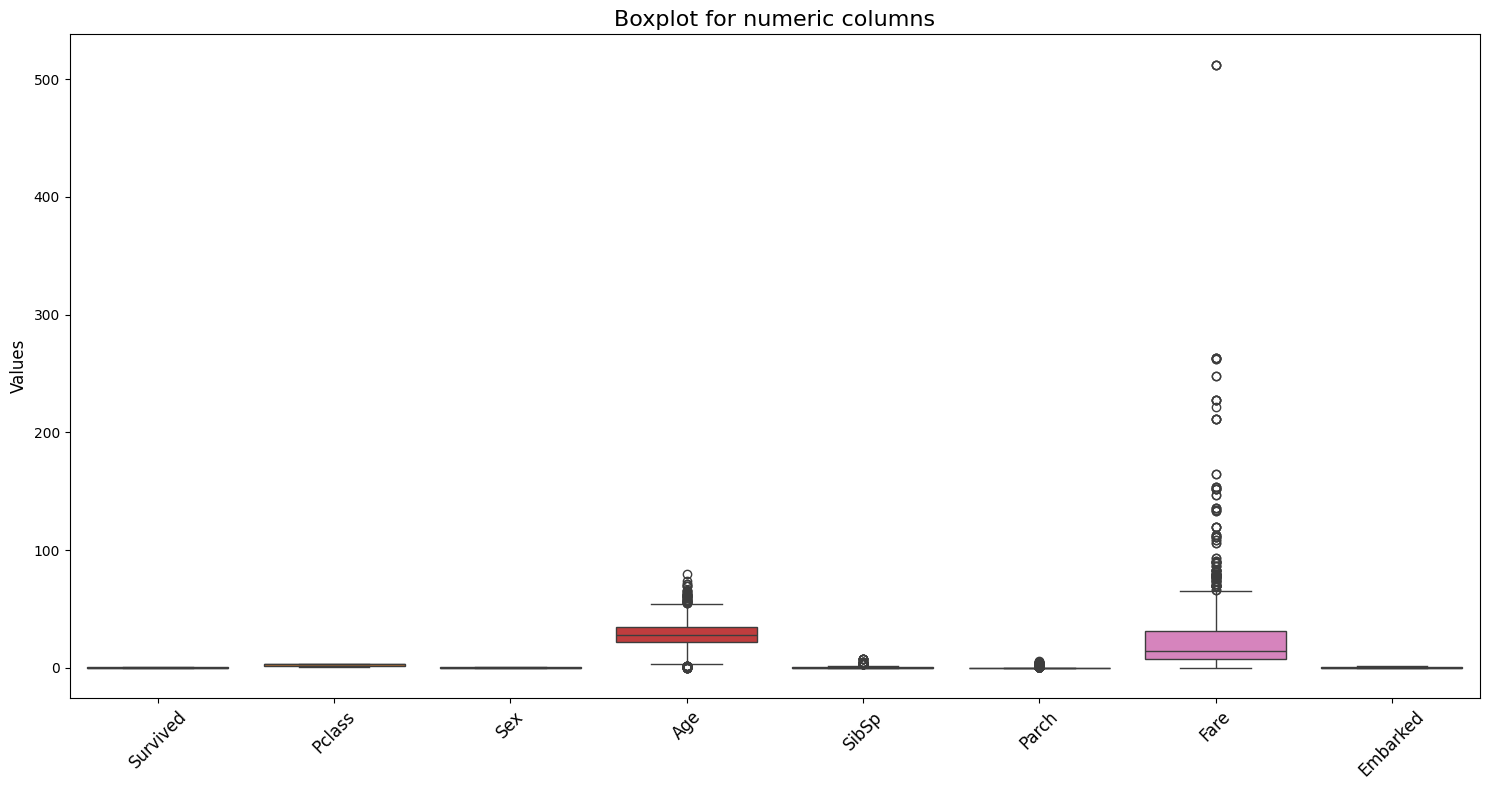

In [11]:
# checking for outliers
# taking only numeric columns
numeric_columns = df.select_dtypes(include=["int64" , "float64"]).columns

# ploting
plt.figure(figsize=(15,8))
sns.boxplot(data = df[numeric_columns])
plt.title("Boxplot for numeric columns" , fontsize = 16)
plt.xticks(rotation=45 , fontsize=12 )
plt.ylabel("Values" , fontsize = 12)
plt.tight_layout()
plt.show()

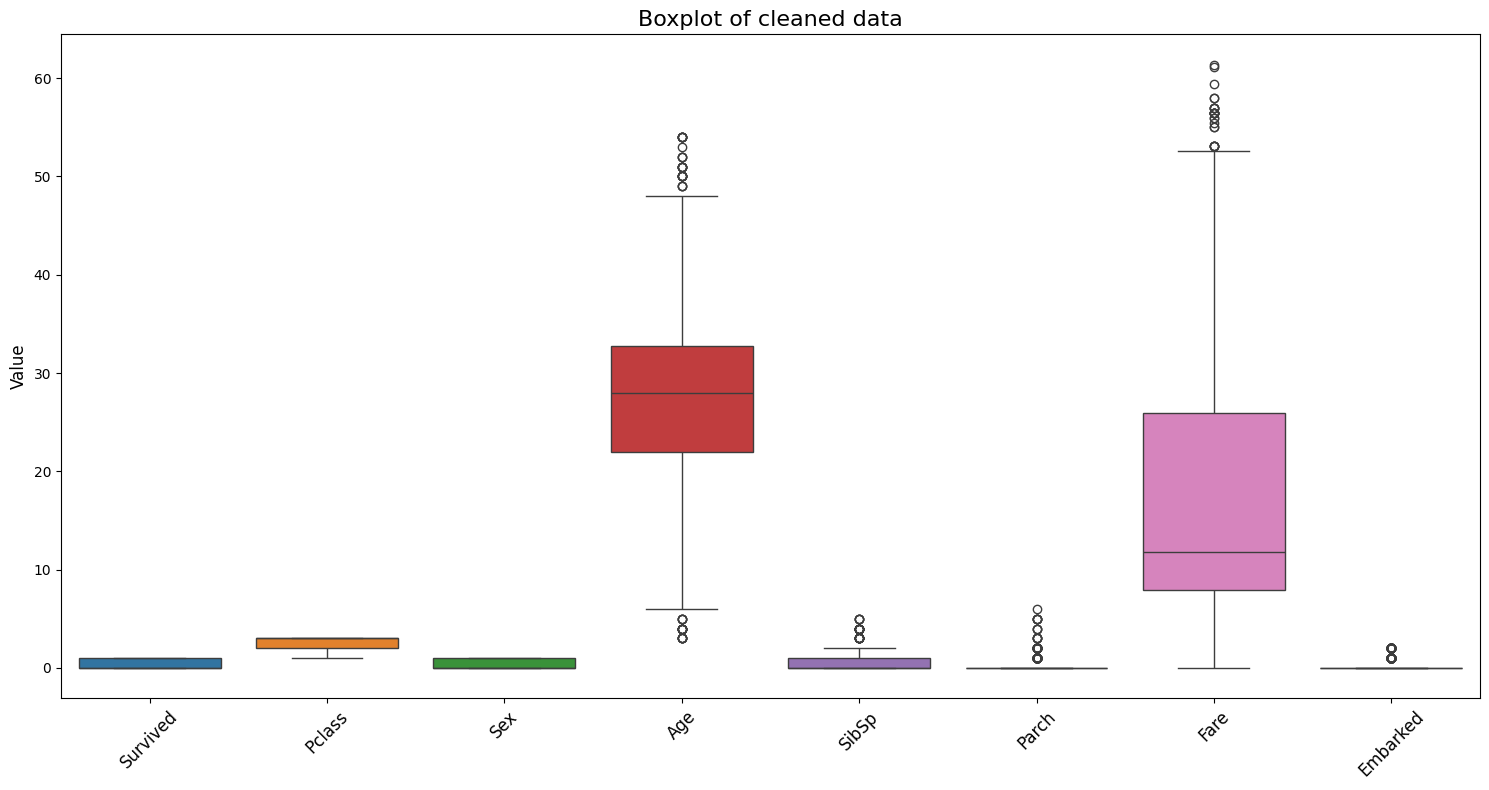

In [12]:
# removing outliers
# Corrected outlier removal function
def outlier_removal(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

# Start with original df
cleaned_df = outlier_removal(df, "Age")
cleaned_df = outlier_removal(cleaned_df, "Fare")  # now pass cleaned_df


plt.figure(figsize = (15,8))
sns.boxplot(data = cleaned_df)
plt.title("Boxplot of cleaned data" , fontsize = 16)
plt.xticks(rotation = 45 , fontsize = 12)
plt.ylabel("Value" , fontsize = 12)
plt.tight_layout()
plt.show()

In [13]:
cleaned_df["Embarked"] = cleaned_df["Embarked"].astype("int")

cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
5,0,3,0,28,0,0,8.4583,2


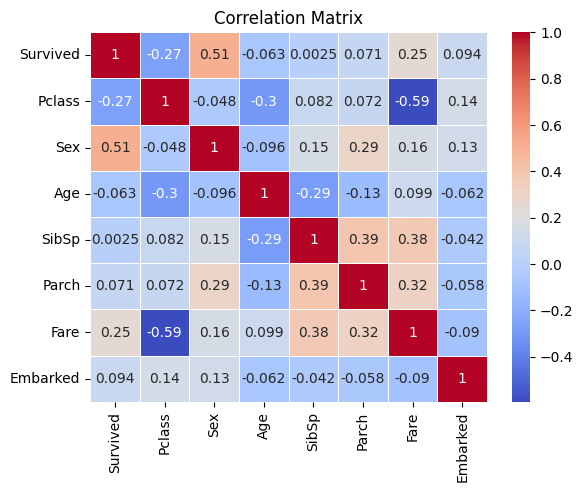

In [23]:
# Correlation Matrix
correlation = cleaned_df.corr()
plt.title("Correlation Matrix")
sns.heatmap(correlation , annot = True , cmap= "coolwarm" , linewidth = 0.5)
plt.show()

### Model Training & Testing

In [15]:
# taking out target and other features

X = cleaned_df.drop("Survived" , axis = 1) # features
y = cleaned_df["Survived"] # Target


In [16]:
# spliting 

X_train , x_test , y_train , y_test = train_test_split(X,
                                                       y , 
                                                       test_size = 0.2 , 
                                                       random_state = 42
                                                      )

In [22]:
# shape
print("X_Train:",X_train.shape)
print("X_Test:" , x_test.shape)
print("Y_Train:" , y_train.shape)
print("Y_Test:" , y_test.shape)

X_Train: (574, 7)
X_Test: (144, 7)
Y_Train: (574,)
Y_Test: (144,)


In [18]:
# model 

model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [19]:
# prediction , Accuracy , Confusion matrix , Classification Report
y_pred = model.predict(x_test)

print("Accuracy : " , metrics.accuracy_score( y_test , y_pred))
print("Confusion matrix: " , metrics.confusion_matrix( y_test , y_pred))
print("Classification Report:" , metrics.classification_report(y_test  , y_pred))

Accuracy :  0.7777777777777778
Confusion matrix:  [[81 14]
 [18 31]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.85      0.84        95
           1       0.69      0.63      0.66        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.75       144
weighted avg       0.77      0.78      0.78       144

